# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
ds = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
ds.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

#Will fillin missing data
ds.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
ds["ENROLL_ALL_EST"] = ds["ENROLL_ALL_EST"].fillna(ds["ENROLL_ALL"])
ds['ENROLL_ALL'] = ds['ENROLL_ALL'].fillna(ds["ENROLL_PREK"]+ds["ENROLL_PRIMARY"]+ds["ENROLL_HS"])

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [4]:
(ds["YEAR"]).nunique()

13

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [5]:
michigan = ds[ds["STATE"] == "MICHIGAN"]["AVG_MATH_8_SCORE"].mean()
ohio = ds[ds["STATE"] == "OHIO"]["AVG_MATH_8_SCORE"].mean()
print("Ohio has the higher average Math Grade 8 Score of" , ohio, " versus Michigan's score of " , michigan)

Ohio has the higher average Math Grade 8 Score of 282.25  versus Michigan's score of  276.1666666666667


Find the average for your outcome score across all states in 2019

In [6]:
ds[ds["YEAR"] == 1992]["AVG_MATH_8_SCORE"].mean()

266.3255813953488

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [7]:
arraybev = ds.groupby("STATE")
arraybev["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [10]:
ds['TOTAL_REVENUE_PER_STUDENT'] = ds['TOTAL_REVENUE'] / ds['ENROLL_ALL']
ds['TOTAL_Expenditure_PER_STUDENT'] = ds['TOTAL_EXPENDITURE'] / ds['ENROLL_ALL']
ds['INSTRUCTION_EXPENDITURE vs AVG MATH 4 SCORE'] = ds['INSTRUCTION_EXPENDITURE']/ds['AVG_MATH_4_SCORE']
ds['Enroll 8 * TOTAL_Expenditure_PER_STUDENT'] = ds['TOTAL_Expenditure_PER_STUDENT'] * ds['ENROLL_8']
ds['Math 4 + Reading 8 AVG'] = (ds['AVG_READING_8_SCORE'] + ds['AVG_MATH_4_SCORE'])/2.0
ds['Math 4 + Reading 4 AVG'] = (ds['AVG_READING_4_SCORE'] + ds['AVG_MATH_4_SCORE'])/2.0
ds

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,TOTAL_REVENUE_PER_STUDENT,TOTAL_Expenditure_PER_STUDENT,INSTRUCTION_EXPENDITURE vs AVG MATH 4 SCORE,Enroll 8 * TOTAL_Expenditure_PER_STUDENT,Math 4 + Reading 8 AVG,Math 4 + Reading 4 AVG
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,208.0,252.0,207.0,NaN,3.661510,3.627221,7123.572115,2.104695e+05,NaN,207.5
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,215.0,265.0,209.0,NaN,4.837699,5.050774,6678.641860,2.478970e+05,NaN,212.0
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,210.0,256.0,211.0,NaN,3.877685,3.948044,4592.014286,1.421730e+05,NaN,210.5
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,208.0,261.0,202.0,NaN,4.997299,5.164536,69033.278846,1.876255e+06,NaN,205.0
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,221.0,272.0,217.0,NaN,5.199137,5.329154,7431.972851,2.399451e+05,NaN,219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,247.0,287.0,224.0,262.0,NaN,NaN,NaN,NaN,254.5,235.5
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,240.0,286.0,220.0,266.0,NaN,NaN,NaN,NaN,253.0,230.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,231.0,272.0,213.0,256.0,NaN,NaN,NaN,NaN,243.5,222.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,242.0,289.0,220.0,267.0,NaN,NaN,NaN,NaN,254.5,231.0


Feature engineering justification: 

I created a column for the instruction expernditure per student for each state and year. It takes the state's population into account, which standardizes the data set. This feature will be used to predict the grade 8 Math scores of the state over time. I then attempted to look at if there was any helpful correlations between instruction expenditures vs revenue, instruction expenditures and 4th grade scores, though they all did not lead to strong conclusions. Lastly, I decided to combine the results of 4th grade Math and 8th grade Reading to see if they correlated strongly with 8th grade Math scores, which they did.


<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

/usr/local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'Average 8th Grade Math Scores')

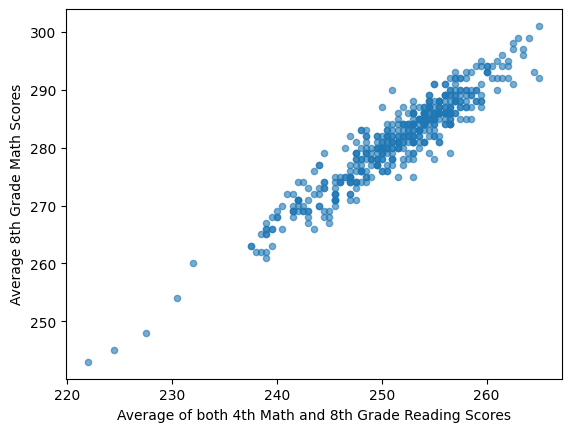

In [11]:
ds.plot.scatter(x='Math 4 + Reading 8 AVG', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Average of both 4th Math and 8th Grade Reading Scores')
plt.ylabel('Average 8th Grade Math Scores')

There is a noticeable positive and linear trends betweeen instruction expenditure per student and 8th grade math scores. There may be seem outliers at the bottom and the far right side of the graph. This data may also be slightly misleading, since instruction expenditure may have increased for states over time due to factors like inflation.

**Visualization 2**

Text(0, 0.5, '8th Grade Math Scores')

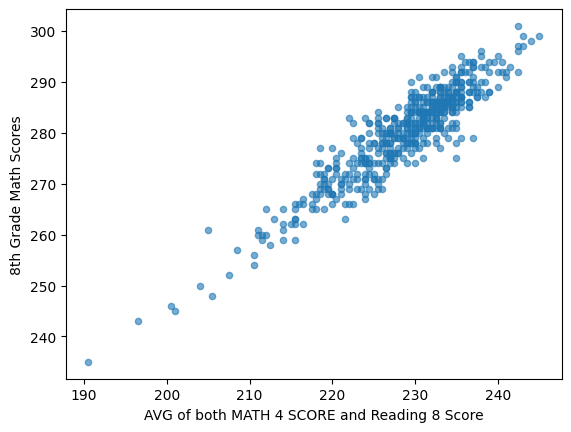

In [12]:
ds.plot.scatter(x='Math 4 + Reading 4 AVG', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('AVG of both MATH 4 SCORE and Reading 8 Score')
plt.ylabel('8th Grade Math Scores')

There is a noticeable positive and linear trends betweeen total revenue per student and 8th grade math scores. There may be seem outliers at the bottom the graph. This data may also be slightly misleading, since instruction expenditure may have increased for states over time due to factors like inflation.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = ds[['Math 4 + Reading 4 AVG','Math 4 + Reading 8 AVG']].dropna()
y = ds.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.mean(), inplace=True)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [16]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [17]:
# create your model here
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [20]:
print(model.intercept_)
print(model.coef_)

-39.42818719851874
[-0.47028331  1.70517243]


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

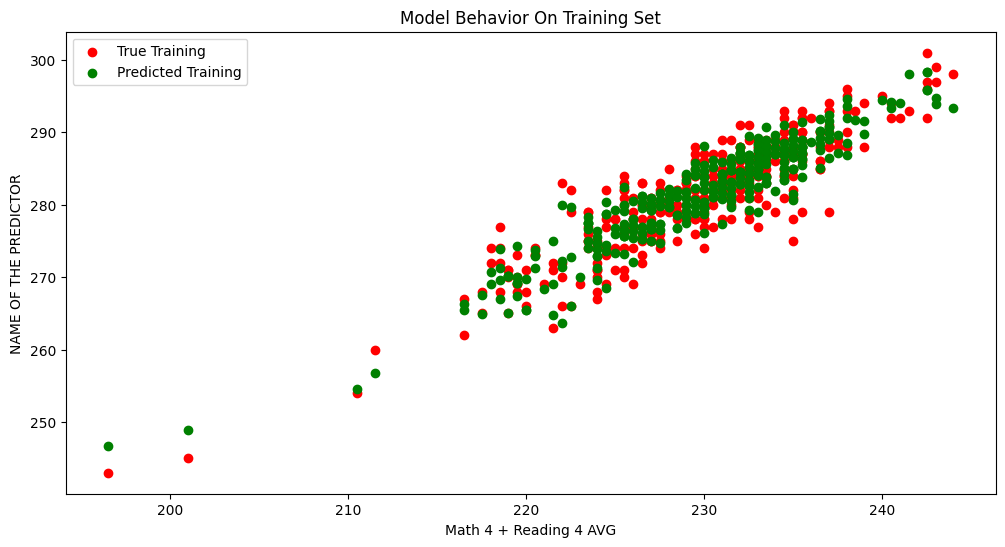

In [21]:
 col_name = 'Math 4 + Reading 4 AVG'

 f = plt.figure(figsize=(12,6))
 plt.scatter(X_train[col_name], y_train, color = "red")
 plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

 plt.legend(['True Training','Predicted Training'])
 plt.xlabel(col_name)
 plt.ylabel('NAME OF THE PREDICTOR')
 plt.title("Model Behavior On Training Set")



0.9002805938215414

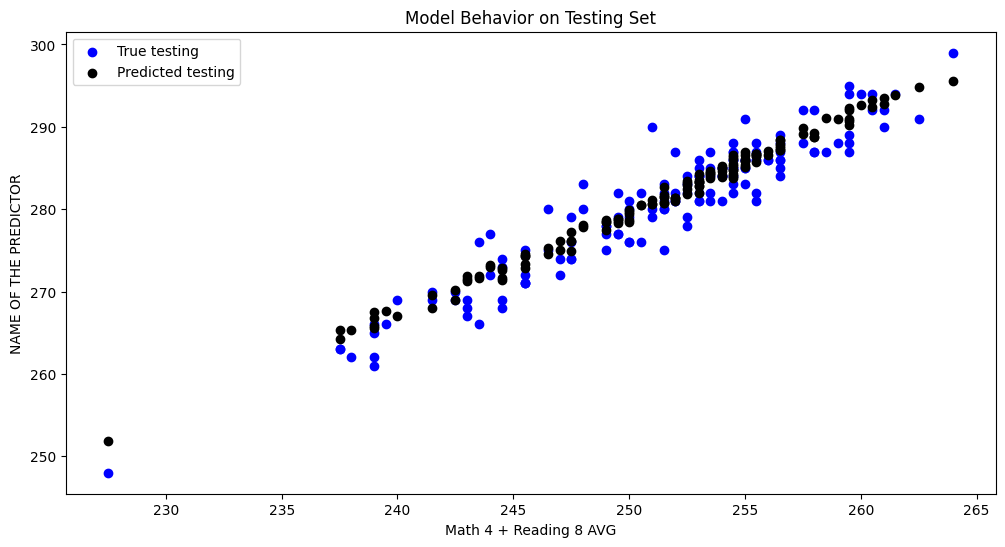

In [23]:
 col_name = 'Math 4 + Reading 8 AVG'

 f = plt.figure(figsize=(12,6))
 plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

 plt.legend(['True testing','Predicted testing'])
 plt.xlabel(col_name)
 plt.ylabel('NAME OF THE PREDICTOR')
 plt.title("Model Behavior on Testing Set")

model.score(X_test, y_test)

<h2> Summary </h2>

In the feature engineering section, I attempt to look at variables/factors that may indicate the 8th grade Math performance for each available data point of state performance of a given year. This included factoring in the total revenue per student, the total expenditure per student, the total enrollment of 8th graders. Such factors were not representative of the data and were ultimately not good predictors. Hence, I simplified my features to two features: The average of 8th grade Reading score + 4th grade Math score, and the average of 4th grade Reading and Math score. I update the table with a few columns, allowing for easier access of these features. I then visualized these features through a scatterplot, in the visualization  section. There was a noticeable, strong, positive and linear trend between the features and the performance of the students in 8th Grade Math, providing a strong indication that these were useful faetures to create training and test data. Hence, in the data creation section, I import the train_test_split library, initialize the x_train and y_train data, and use those to predict the performance of the 8th grade Math scores. The model score ends up being greater than 0.90, which corroborates that the two features utilized for the training and test data in the model, were excellent.